In [1]:
!ls

ipy.cupy.ipy
ipy.ipy
notes.txt
rbfinterp_time.gonzales.jax.numpy.cpu.jit.txt
rbfinterp_time.gonzales.jax.numpy.cpu.nojit.txt
rbfinterp_time.gonzales.numpy.cpu.jit.txt
rbfinterp_time.gonzales.numpy.cpu.nojit.txt
rbfinterp_time.gonzales.torch.cpu.jit.txt
rbfinterp_time.gonzales.torch.cpu.nojit.txt
rbfinterp_time.qgpu3.cupy.cuda.nojit.txt
rbfinterp_time.qgpu3.jax.numpy.cpu.jit.txt
rbfinterp_time.qgpu3.jax.numpy.cpu.nojit.txt
rbfinterp_time.qgpu3.jax.numpy.cuda.jit.txt
rbfinterp_time.qgpu3.jax.numpy.cuda.nojit.txt
rbfinterp_time.qgpu3.numpy.cpu.jit.txt
rbfinterp_time.qgpu3.numpy.cpu.nojit.txt
rbfinterp_time.qgpu3.torch.cpu.jit.txt
rbfinterp_time.qgpu3.torch.cpu.nojit.txt
rbfinterp_time.qgpu3.torch.cuda.jit.txt
rbfinterp_time.qgpu3.torch.cuda.nojit.txt
timings_cpu.ipynb


We're trying to assess generalizing the SciPy's RBFInterpolator to Array API compatible backends + `numba` (because why not). 
The SciPy changes are https://github.com/scipy/scipy/compare/main...ev-br:scipy:rbf_array_api_2?expand=1, and we're benchmarking it on two machines: a 4-core Intel i5 laptop (`gonzales`) and a 32-core AMD Threadpiper 3970X server with an RTX 2060 GPU accelerator (`qgpu3`).

In the data files, `"numpy.jit"` stands for `numba` jit compilation.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)

In [4]:
cols = ["N", "time", "stdev"]

df = pd.DataFrame(columns=cols + ["machine", "backend", "jit"])
for machine in ["gonzales", "qgpu3"]:
    for backend in ["numpy", "torch", "jax.numpy", "cupy"]:
        for device in ["cpu", "cuda"]:
            for jit in ["nojit", "jit"]:
                fname = f"rbfinterp_time.{machine}.{backend}.{device}.{jit}.txt"
                try:
                    df_ = pd.read_csv(fname, names=cols, skiprows=1)
                except Exception:
                    print(f"Skipping {fname}")
                    continue
                df_["machine"] = machine
                df_["backend"] = backend
                df_["device"] = device
                df_["jit"] = jit
                if df.empty:
                    df = df_
                else:
                    df = pd.concat([df, df_], ignore_index=True)

# rename values 
df.loc[ df["jit"] == "nojit", "jit" ] = "eager"
df

Skipping rbfinterp_time.gonzales.numpy.cuda.nojit.txt
Skipping rbfinterp_time.gonzales.numpy.cuda.jit.txt
Skipping rbfinterp_time.gonzales.torch.cuda.nojit.txt
Skipping rbfinterp_time.gonzales.torch.cuda.jit.txt
Skipping rbfinterp_time.gonzales.jax.numpy.cuda.nojit.txt
Skipping rbfinterp_time.gonzales.jax.numpy.cuda.jit.txt
Skipping rbfinterp_time.gonzales.cupy.cpu.nojit.txt
Skipping rbfinterp_time.gonzales.cupy.cpu.jit.txt
Skipping rbfinterp_time.gonzales.cupy.cuda.nojit.txt
Skipping rbfinterp_time.gonzales.cupy.cuda.jit.txt
Skipping rbfinterp_time.qgpu3.numpy.cuda.nojit.txt
Skipping rbfinterp_time.qgpu3.numpy.cuda.jit.txt
Skipping rbfinterp_time.qgpu3.cupy.cpu.nojit.txt
Skipping rbfinterp_time.qgpu3.cupy.cpu.jit.txt
Skipping rbfinterp_time.qgpu3.cupy.cuda.jit.txt


,N,time,stdev,machine,backend,device,jit
0,50,0.003285,2.633304e-05,gonzales,numpy,cpu,eager
1,100,0.014319,3.713034e-04,gonzales,numpy,cpu,eager
2,500,0.362855,5.375288e-03,gonzales,numpy,cpu,eager
3,1000,1.885408,3.835172e-02,gonzales,numpy,cpu,eager
4,2000,8.781389,4.082505e-01,gonzales,numpy,cpu,eager
5,50,0.009429,4.543888e-04,gonzales,numpy,cpu,jit
6,100,0.038029,9.001364e-04,gonzales,numpy,cpu,jit
7,500,0.982522,2.761055e-02,gonzales,numpy,cpu,jit
8,1000,4.326344,1.686352e-01,gonzales,numpy,cpu,jit
9,2000,19.374657,2.210267e-01,gonzales,numpy,cpu,jit


# CPU timings

### Base timings, numpy/pythran

In [5]:
df_np = df.loc[(df["backend"] == "numpy") & (df["jit"] == "eager") ]
df_np

,N,time,stdev,machine,backend,device,jit
0,50,0.003285,0.000026,gonzales,numpy,cpu,eager
1,100,0.014319,0.000371,gonzales,numpy,cpu,eager
2,500,0.362855,0.005375,gonzales,numpy,cpu,eager
3,1000,1.885408,0.038352,gonzales,numpy,cpu,eager
4,2000,8.781389,0.408250,gonzales,numpy,cpu,eager
30,50,0.003009,0.000001,qgpu3,numpy,cpu,eager
31,100,0.022632,0.000199,qgpu3,numpy,cpu,eager
32,500,0.569748,0.004846,qgpu3,numpy,cpu,eager
33,1000,2.268105,0.006025,qgpu3,numpy,cpu,eager
34,2000,8.117150,0.015577,qgpu3,numpy,cpu,eager


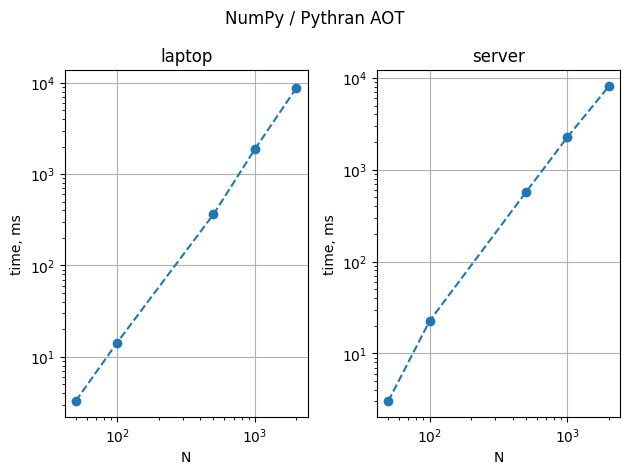

In [6]:
fig, axx = plt.subplots(1, 2)

df__ = df_np.loc[df["machine"] == "gonzales"]
axx[0].errorbar(df__["N"], df__["time"]*1000, yerr=df__["stdev"]*1000, fmt='o--')
axx[0].set_yscale("log")
axx[0].set_xscale("log")

axx[0].set_xlabel("N")
axx[0].set_ylabel("time, ms")
axx[0].grid(True)
axx[0].set_title("laptop")

df__ = df_np.loc[df["machine"] == "qgpu3"]
axx[1].errorbar(df__["N"], df__["time"]*1000, yerr=df__["stdev"]*1000, fmt='o--')
axx[1].set_yscale("log")
axx[1].set_xscale("log")

axx[1].set_xlabel("N")
axx[1].set_ylabel("time, ms")
axx[1].grid(True)
axx[1].set_title("server")

fig.suptitle("NumPy / Pythran AOT")
plt.tight_layout()

The scaling of time with the problem size is nearly quadratic, consistent with the main work being filling in the kernel matrix:

In [15]:
from scipy.stats import linregress

for machine in ["gonzales", "qgpu3"]:
    df__ = df_np.loc[df["machine"] == machine]
    print(machine, " : slope = ", linregress(np.log(df__["N"]), np.log(df__["time"])).slope)

gonzales  : slope =  2.125965202529139
qgpu3  : slope =  2.107672974493507


### Speedups w.r.t. numpy/pythran AOT

In [7]:
grp_dict = df.groupby(["machine", "jit", "backend", "device"]).groups

base_idx = grp_dict[("gonzales", "eager", "numpy", "cpu")]
base_gonz = df.iloc[base_idx]
base_qgpu3 = df.iloc[ grp_dict[("qgpu3", "eager", "numpy", "cpu")] ]

print(base_gonz)
print(base_qgpu3)

      N      time     stdev   machine backend device    jit
0    50  0.003285  0.000026  gonzales   numpy    cpu  eager
1   100  0.014319  0.000371  gonzales   numpy    cpu  eager
2   500  0.362855  0.005375  gonzales   numpy    cpu  eager
3  1000  1.885408  0.038352  gonzales   numpy    cpu  eager
4  2000  8.781389  0.408250  gonzales   numpy    cpu  eager
       N      time     stdev machine backend device    jit
30    50  0.003009  0.000001   qgpu3   numpy    cpu  eager
31   100  0.022632  0.000199   qgpu3   numpy    cpu  eager
32   500  0.569748  0.004846   qgpu3   numpy    cpu  eager
33  1000  2.268105  0.006025   qgpu3   numpy    cpu  eager
34  2000  8.117150  0.015577   qgpu3   numpy    cpu  eager


In [8]:
dfs = []

for key, idx in grp_dict.items():
    df_ = df.iloc[idx]
    base_df = base_gonz if key[0] == "gonzales" else base_qgpu3

    df__ = pd.concat([
                df_.set_index("N"),
                base_df.set_index("N")[["time"]].rename(columns={"time": "np_time"})
                    ], axis=1, join='inner'
           ).reset_index()
    df__["speedup"] = df__["np_time"] / df__["time"]

    dfs.append(df__)

df_ = pd.concat(dfs, ignore_index=True)
df_

,N,time,stdev,machine,backend,device,jit,np_time,speedup
0,50,0.004545,1.474793e-03,gonzales,jax.numpy,cpu,eager,0.003285,0.722699
1,100,0.030022,2.983969e-03,gonzales,jax.numpy,cpu,eager,0.014319,0.476929
2,500,0.702761,3.496637e-02,gonzales,jax.numpy,cpu,eager,0.362855,0.516328
3,1000,2.405938,6.581155e-02,gonzales,jax.numpy,cpu,eager,1.885408,0.783648
4,2000,10.642563,2.405470e-01,gonzales,jax.numpy,cpu,eager,8.781389,0.825120
5,50,0.003285,2.633304e-05,gonzales,numpy,cpu,eager,0.003285,1.000000
6,100,0.014319,3.713034e-04,gonzales,numpy,cpu,eager,0.014319,1.000000
7,500,0.362855,5.375288e-03,gonzales,numpy,cpu,eager,0.362855,1.000000
8,1000,1.885408,3.835172e-02,gonzales,numpy,cpu,eager,1.885408,1.000000
9,2000,8.781389,4.082505e-01,gonzales,numpy,cpu,eager,8.781389,1.000000


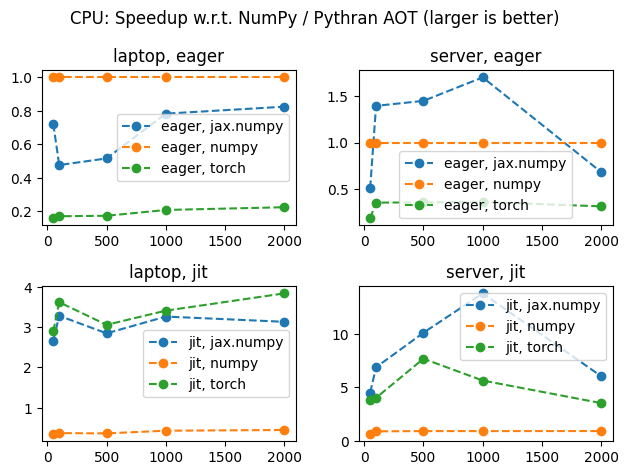

In [9]:
fix, ax = plt.subplots(2, 2)
fig.set_size_inches(12, 8)
plt.suptitle("CPU: Speedup w.r.t. NumPy / Pythran AOT (larger is better)")

df_cpu = df_[df_.device == "cpu"].reset_index(drop=True)

grp_dict = df_cpu.groupby(["machine", "jit", "backend"]).groups
for key, idx in grp_dict.items():
    this_df = df_cpu.iloc[idx]
    
    r = {"eager": 0, "jit": 1}[key[1]]
    c = {"gonzales": 0, "qgpu3": 1}[key[0]]
    
    ax[r][c].plot(this_df["N"], this_df["speedup"], 'o--', label=f"{key[1]}, {key[2]}")

ax[0, 0].legend()
ax[0, 1].legend()
ax[1, 0].legend()
ax[1, 1].legend()

ax[0, 0].set_title('laptop, eager')
ax[1, 0].set_title('laptop, jit')

ax[0, 1].set_title('server, eager')
ax[1, 1].set_title('server, jit')

plt.tight_layout()


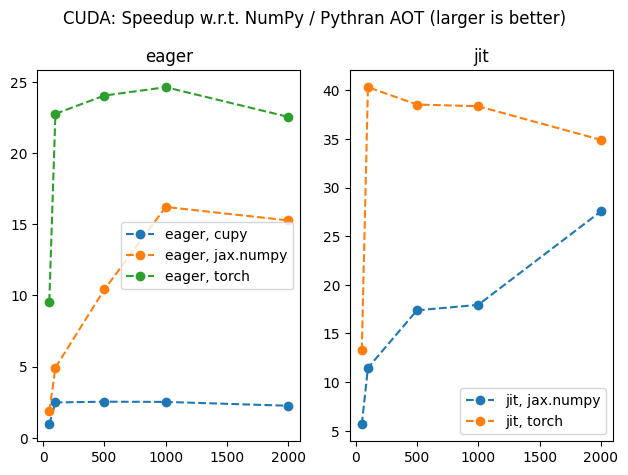

In [10]:
fix, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 8)
plt.suptitle("CUDA: Speedup w.r.t. NumPy / Pythran AOT (larger is better)")

df_cuda = df_[df_.device == "cuda"].reset_index(drop=True)

grp_dict = df_cuda.groupby(["machine", "jit", "backend"]).groups
for key, idx in grp_dict.items():
    this_df = df_cuda.iloc[idx]
    
    r = {"eager": 0, "jit": 1}[key[1]]
    
    ax[r].plot(this_df["N"], this_df["speedup"], 'o--', label=f"{key[1]}, {key[2]}")

ax[0].legend()
ax[1].legend()

ax[0].set_title('eager')
ax[1].set_title('jit')

plt.tight_layout()

In [11]:
df_cuda

,N,time,stdev,machine,backend,device,jit,np_time,speedup
0,50,0.003234,0.000000e+00,qgpu3,cupy,cuda,eager,0.003009,0.930373
1,100,0.009151,0.000000e+00,qgpu3,cupy,cuda,eager,0.022632,2.473285
2,500,0.225381,0.000000e+00,qgpu3,cupy,cuda,eager,0.569748,2.527928
3,1000,0.902607,0.000000e+00,qgpu3,cupy,cuda,eager,2.268105,2.512838
4,2000,3.620171,0.000000e+00,qgpu3,cupy,cuda,eager,8.117150,2.242201
5,50,0.001633,1.507514e-04,qgpu3,jax.numpy,cuda,eager,0.003009,1.842946
6,100,0.004593,2.654757e-04,qgpu3,jax.numpy,cuda,eager,0.022632,4.927198
7,500,0.054670,6.108313e-04,qgpu3,jax.numpy,cuda,eager,0.569748,10.421516
8,1000,0.139860,1.041345e-04,qgpu3,jax.numpy,cuda,eager,2.268105,16.217026
9,2000,0.531535,2.193585e-04,qgpu3,jax.numpy,cuda,eager,8.117150,15.271155
